In [63]:
!pip install sklearn

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.cluster import OPTICS
from sklearn.metrics import rand_score, homogeneity_score, completeness_score
from sklearn.manifold import TSNE



ImportError: ignored

In [65]:
true_labels = np.load('true_label.npy')

In [66]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [67]:
def run_on_batch(X, y):
    clf = OPTICS(min_samples=10)
    predicted = clf.fit_predict(X, y)

    print("Homogeneity Score: {}".format(homogeneity_score(y, predicted)))
    print("Completeness Score: {}".format(completeness_score(y, predicted)))

    tsne = TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X)

    plot_embedding(X_tsne, y, "t-SNE das classes")

Images 600:
Homogeneity Score: 1.2018731994384412e-16
Completeness Score: 1.0


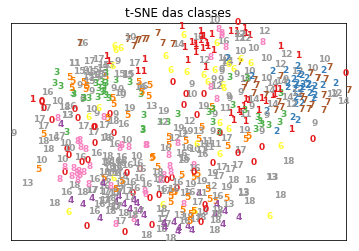

In [68]:
print("Images 600:")
run_on_batch(np.load('images_600.npy'), true_labels)


Raw images flatten:
Homogeneity Score: 1.2018731994384412e-16
Completeness Score: 1.0


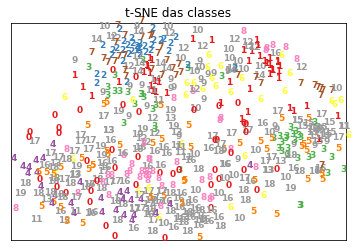

In [69]:
print("Raw images flatten:")
run_on_batch(np.load('raw_images_flatten.npy'), true_labels)

Embeddings:
Homogeneity Score: 0.018391068244479013
Completeness Score: 0.1818633534914109


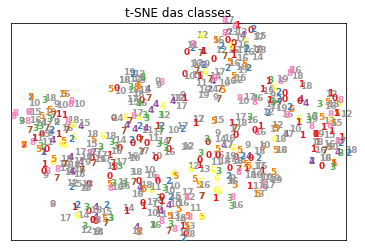

In [77]:
print("Embeddings:")
run_on_batch(np.load('embeddings.npy')[:602], true_labels[:602])